## Q1: Implement Gaussian Elimination 

In [19]:
import numpy as np

def forward_elimination_REF(A, b, n):
    """
    Calculates the forward part of Gaussian elimination.
    """
    # Go through all the rows
    for row in range(0, n-1):
        # For each row, go through all the rows below it
        for i in range(row+1, n):
            # Calculate the scaling factor for this row
            factor = A[i,row] / A[row,row]
            # Go through each column in the row and adjust the values
            for j in range(row, n):
                A[i,j] = A[i,j] - factor * A[row,j]

            # Also adjust the corresponding value in the solution vector
            b[i] = b[i] - factor * b[row]

        # Print the state of the matrix and solution vector
        print('A = \n%s and b = %s' % (A,b))
    return A, b

def forward_elimination_RREF(A, b, n):
    """
    Modifies A into Reduced Row Echelon Form (RREF).
    """
    # Go through each row
    for i in range(n):
        # Make the diagonal element of the row equal to 1
        pivot = A[i,i]
        A[i] = A[i] / pivot  # make the pivot 1
        b[i] = b[i] / pivot  # adjust b accordingly

        # For each row below, subtract a multiple of the current row
        # to eliminate the leading element (make it 0)
        for row in range(i+1, n):
            factor = A[row, i]
            A[row] = A[row] - factor * A[i]
            b[row] = b[row] - factor * b[i]
            
    return A, b

def back_substitution(a, b, n):
    """"
    Does back substitution, returns the Gauss result.
    """
    # Initialise result vector with zeros
    x = np.zeros((n,1))
    
    # Solve the last row
    x[n-1] = b[n-1] / a[n-1, n-1]
    
    # Solve other rows, from second-last to first
    for row in range(n-2, -1, -1):
        # Start with the RHS value
        sums = b[row]
        
        # Then subtract the other known values
        for j in range(row+1, n):
            sums = sums - a[row,j] * x[j]
        
        # Result is remaining value
        x[row] = sums / a[row,row]
    return x

def gauss(A, b, method='REF'):
    """
    This function performs Gauss elimination without pivoting.
    """
    # Determine the number of rows (equations)
    n = A.shape[0]

    # Check for zero diagonal elements
    if any(np.diag(A)==0):
        raise ZeroDivisionError('Division by zero will occur')

    # Depending on the method, perform Gaussian elimination in REF or RREF
    if method == 'RREF':
        A, b = forward_elimination_RREF(A, b, n)
    else:  # default is REF
        A, b = forward_elimination_REF(A, b, n)

    # Perform back substitution to solve for variables
    return back_substitution(A, b, n)


A = np.array([[2.,3.,4.],[1.,2.,3.],[4.,0.,1.]])
b = np.array([1.,2.,3.])
# To solve using RREF omit "REF" and change to "RREF", and vice versa.
x = gauss(A,b, method='REF')

print('Gauss result is x = \n %s' % x)

A = 
[[ 2.   3.   4. ]
 [ 0.   0.5  1. ]
 [ 0.  -6.  -7. ]] and b = [1.  1.5 1. ]
A = 
[[2.  3.  4. ]
 [0.  0.5 1. ]
 [0.  0.  5. ]] and b = [ 1.   1.5 19. ]
Gauss result is x = 
 [[-0.2]
 [-4.6]
 [ 3.8]]


## Q2: Markov Chains

<b>Example(2) slide 7 - Gambler Markov chain</b>

<b>2a)</b>

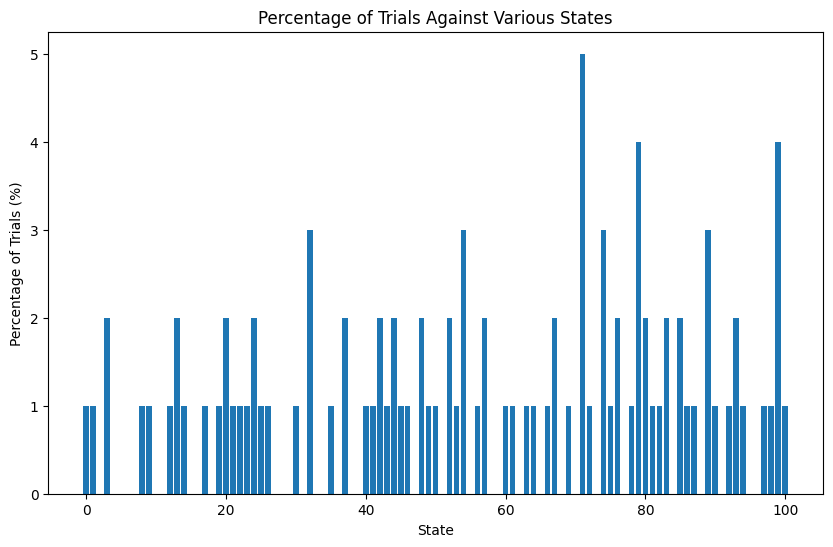

In [21]:
import random
import matplotlib.pyplot as plt

# parameters
num_trials = 100
num_moves = 100
states = [i for i in range(101)]  # states from 0 to 100

# record the final states
final_states = []

for _ in range(num_trials):
    # randomly choose an initial state
    state = random.choice(states)
    
    for _ in range(num_moves):
        # coin flip, 1 for heads, 0 for tails
        coin_flip = random.choice([0, 1])
        
        # update state based on coin flip
        if coin_flip == 1 and state < 100:  # heads and current state less than 100
            state += 1
        elif coin_flip == 0 and state > 0:  # tails and current state more than 0
            state -= 1

    final_states.append(state)

# count the frequency of final states
state_freq = [final_states.count(state) for state in states]

# convert to percentages
state_perc = [freq / num_trials * 100 for freq in state_freq]

# plot
plt.figure(figsize=(10, 6))
plt.bar(states, state_perc)
plt.title('Percentage of Trials Against Various States')
plt.xlabel('State')
plt.ylabel('Percentage of Trials (%)')
plt.show()

<b>2b)</b>

A Markov Chain is said to have a steady state distribution if it is both irreducible and aperiodic. A chain is irreducible if it's possible to reach any state from any other state, and aperiodic if the greatest common divisor of the lengths of its cycles is one. For a gambler with unlimited coin flips, these conditions are met, indicating an ergodic chain with a steady-state distribution. The steady-state probability P(i) for being in state i can be calculated as (1/2)^i, but this must be normalised so that the total probabilities sum up to 1. This is done by dividing each probability by the sum of (1/2)^i for i=0 to 100, denoted as Z, so the normalised steady-state probabilities become P(i) = (1/2)^i / Z.

Code below computes and plots these steady state probabilities:

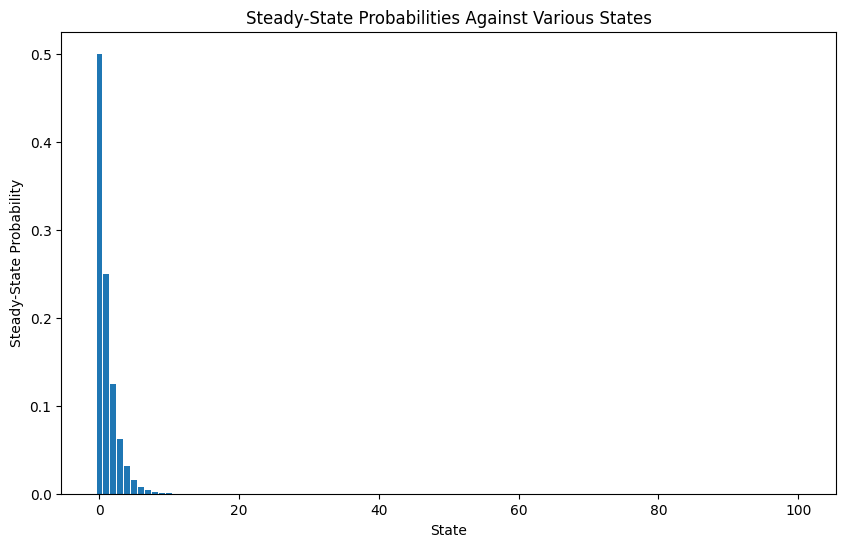

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
states = [i for i in range(101)]  # states from 0 to 100

# calculate steady-state probabilities
probabilities = [0.5**state for state in states]

# normalise probabilities
Z = sum(probabilities)
steady_state_probabilities = [p/Z for p in probabilities]

# plot
plt.figure(figsize=(10, 6))
plt.bar(states, steady_state_probabilities)
plt.title('Steady-State Probabilities Against Various States')
plt.xlabel('State')
plt.ylabel('Steady-State Probability')
plt.show()

<b>2c)</b>

The results from the simulation in a) might not match up exactly with the steady-state distribution in b).
This could be due to chance in each test run and the fact that we only do a limited number of trials and moves in each trial. This difference is called a sampling error, which always happens when we compare real-world results with theory. 

In this case, the chance comes from the fair coin flips, and the limited number of trials and moves can affect how close our simulation can get to the theory. 

If we do more trials (e.g. 200): 
The result from a) gets closer to the steady-state distribution. That's because the more trials we do, the closer the average result should get to what we expect. 

If we do fewer trials (e.g. 50): 
The result from a) gets further from the steady-state distribution because we have less data and the sampling error can have a bigger effect.

<b>Example(3) slide 8 - Communication channel Markov chain</b>

<b>2a)</b>

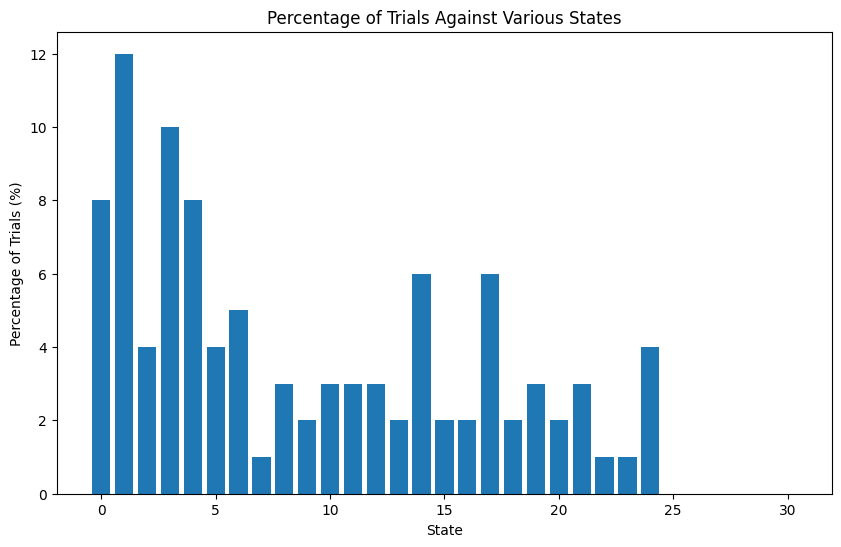

In [24]:
import random
import matplotlib.pyplot as plt

# parameters
num_trials = 100
num_moves = 100
buffer_size = 30
alpha = 0.3
beta = 0.4
states = [i for i in range(buffer_size + 1)]  # states from 0 to N

# record the final states
final_states = []

for _ in range(num_trials):
    # randomly choose an initial state
    state = random.choice(states)
    
    for _ in range(num_moves):
        # transition probabilities
        transition_probs = [beta if state > 0 else 0,  # to i-1
                            1 - alpha - beta,  # to i
                            alpha if state < buffer_size else 0]  # to i+1
        
        # normalise transition probabilities
        total = sum(transition_probs)
        transition_probs = [p/total for p in transition_probs]
        
        # choose new state
        state_change = random.choices([-1, 0, 1], transition_probs)[0]
        state += state_change

    final_states.append(state)

# count the frequency of final states
state_freq = [final_states.count(state) for state in states]

# convert to percentages
state_perc = [freq / num_trials * 100 for freq in state_freq]

# plot
plt.figure(figsize=(10, 6))
plt.bar(states, state_perc)
plt.title('Percentage of Trials Against Various States')
plt.xlabel('State')
plt.ylabel('Percentage of Trials (%)')
plt.show()

<b>2b)</b>

Same as the previous markov chain, this one is also irreducible and aperiodic, so it should have a steady-state distribution.

It's irreducible because it's possible to get from any state to any other state over time, meaning you can always either receive more messages until the buffer is full or transmit messages until the buffer is empty.

It's aperiodic because the chain can remain in the same state for more than one time step (if no new messages arrive).

To find the steady-state distribution analytically, we can set up a system of linear equations based on the balance equations for a Markov Chain:
pi(i-1)*beta = pi(i)alpha for i in [1,N]
pi(i)[1-alpha-beta] = pi(i-1)*beta + pi(i+1)alpha for i in [1,N-1]
pi(N)[1-alpha] = pi(N-1)*beta

The solution to these equations will give the steady-state probabilities for each state.

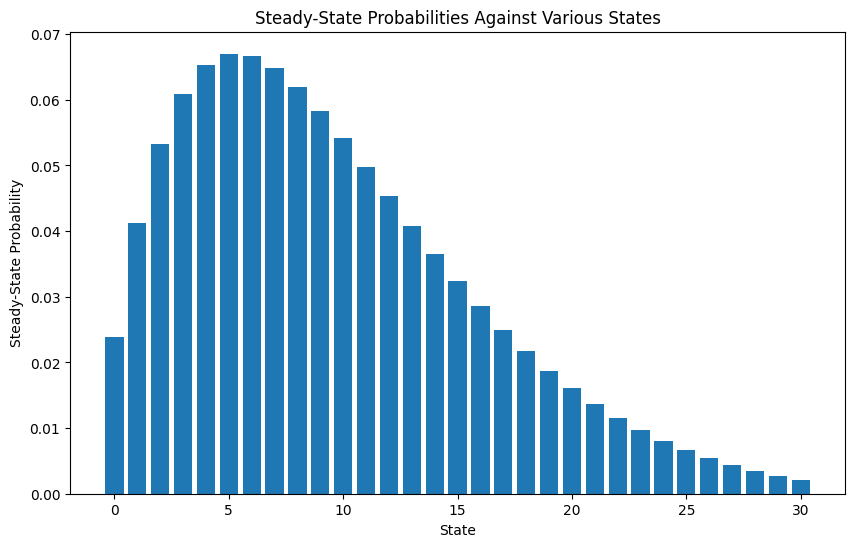

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
alpha = 0.3
beta = 0.4
buffer_size = 30
states = [i for i in range(buffer_size + 1)]  # states from 0 to N

# initial guess for steady-state probabilities
pi = np.full(buffer_size + 1, 1 / (buffer_size + 1))

# iterate until convergence
while True:
    new_pi = np.zeros(buffer_size + 1)
    new_pi[0] = pi[0] * (1 - alpha - beta) + pi[1] * beta
    for i in range(1, buffer_size):
        new_pi[i] = pi[i-1] * alpha + pi[i] * (1 - alpha - beta) + pi[i+1] * beta
    new_pi[buffer_size] = pi[buffer_size-1] * alpha + pi[buffer_size] * (1 - beta)
    
    # normalise
    new_pi /= sum(new_pi)
    
    # check convergence
    if np.max(np.abs(new_pi - pi)) < 1e-6:
        break
    
    pi = new_pi

# plot
plt.figure(figsize=(10, 6))
plt.bar(states, pi)
plt.title('Steady-State Probabilities Against Various States')
plt.xlabel('State')
plt.ylabel('Steady-State Probability')
plt.show()

<b>2c)</b>

Like in the first markov chain, the results from part a) might not line up with the steady-state distribution from part b). 
This is because of chance and the limited number of trials we do - something called 'sampling error'. 

If we do more trials in part a) (e.g. 200): 
The results will get closer to the steady-state distribution. That's because the more trials we do, the closer we get to the expected outcome. 

If we do fewer trials (e.g. 50):

The results will be further from the steady-state distribution, as we have less data and chance plays a bigger part. 

The number of moves in each test can also affect the results. If we don't do enough moves, the results might not be close to the steady-state distribution, because we didn't give it enough time. But if we do more moves, we give it more time to reach the steady state, so our results should be closer to the steady-state distribution.
